In [2]:
import random
import numpy as np
import pandas as pd


## Pandas Series
A pandas series is a one -dimensional-array-like object that can hold any data type (int ,floats, string et)

**Creating a Series**
you can create a series from e.g a list, an array and from dictionary



In [3]:
# create a series using a list:

number_list = [x for x in range(30,40)]
print(number_list)

# now i can make a series form this list:

my_first_series = pd.Series(number_list)
print(my_first_series)
isinstance(my_first_series, pd.Series)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int64


[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
0    30
1    31
2    32
3    33
4    34
5    35
6    36
7    37
8    38
9    39
dtype: int64


True

In [4]:
print(f"Seriens minsta värde: {my_first_series.min()}")
print(f"Seriens största värde: {my_first_series.max()}")
print(f"Seriens medelvärde: {my_first_series.mean()}")
print(f"Seriens standard avvikelse: {my_first_series.std():.3f}")

Seriens minsta värde: 30
Seriens största värde: 39
Seriens medelvärde: 34.5
Seriens standard avvikelse: 3.028


### Interaction with other Series object
** How does a Series interact with other objects of the same class under e.g., addition or multiplication

In [5]:
list_one  = [1,2,3]
list_two  = [5,6,7]
list_3 =list_one+list_two
print(list_3)
print(pd.Series(list_one))
print(pd.Series(list_two))
# Elementwise addition 
list_se = pd.Series(list_one)+pd.Series(list_two)
# Note : returns a new Series-type object
print(list_se)
list_mul = pd.Series(list_one)*pd.Series(list_two)
print(list_mul)
list_div = pd.Series(list_one)/pd.Series(list_two)
print(list_div.round(2))

[1, 2, 3, 5, 6, 7]
0    1
1    2
2    3
dtype: int64
0    5
1    6
2    7
dtype: int64
0     6
1     8
2    10
dtype: int64
0     5
1    12
2    21
dtype: int64
0    0.20
1    0.33
2    0.43
dtype: float64


In [6]:
my_first_series[1]+2

np.int64(33)

We can also extract multiple elements simultaneously:

In [7]:
my_first_series[:4]
my_first_series[:4].max()


np.int64(33)

## Pandas DataFrame
a dataframe is a 2d labeled data structure in pandas , similar to a table or a spreadsheet
Each column might hold different types of data (integers, floats, strings etc)


In [8]:
names = ['Amir', 'Swash', 'Rozann', 'Ali']
ages = [2.5, 5, 31, 35]
eye_colors = ['blue' , 'orange' , 'brown' , 'green']

# We can with ease create Dataframes using dictionaries

family_dict = { 'name' : names, 'age' : ages , 'eye_color' : eye_colors }
family_df = pd.DataFrame(family_dict)
family_df

,name,age,eye_color
0,Amir,2.5,blue
1,Swash,5.0,orange
2,Rozann,31.0,brown
3,Ali,35.0,green


We can select specific columns from our Dataframe using the column names:

In [9]:
# note that the returned column is given as a series object:
family_df['name']

family_df[['name', 'age']]            
family_df[['name', 'age', 'name']]            

,name,age,name
0,Amir,2.5,Amir
1,Swash,5.0,Swash
2,Rozann,31.0,Rozann
3,Ali,35.0,Ali


## Further Indexing
In pandas, selecting  specific rows and columns is essential for analyzing data. Pandas offers two primary methods to do this :\
.iloc() # index location\
.loc() # location


In [10]:
data = {
    'Name' : ['Alice' , 'Bob' , 'Charlie'  , 'David' , 'Eva' , 'Frank' , 'Grace' , 'Helen' , 'Ian'],
    'Age' : [25,30,35,40,22,29,28,22,31],
    'Salary' : [50000,60000,70000,800000,52000,62000,75000,55000,100000]

}
data_df = pd.DataFrame(data)
data_df
data_df['Salary'].mean().round(3)

np.float64(147111.111)

In [11]:
# we can use slicing to select multiple rows
data_df[1:5] # rows 1 to 4 and 5 not included

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,800000
4,Eva,22,52000


In [12]:
data_df.iloc[3,2] # select the value in the row with index 3, and column with index 2(salary)
data_df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,800000
4,Eva,22,52000
5,Frank,29,62000
6,Grace,28,75000
7,Helen,22,55000
8,Ian,31,100000


In [13]:
data_df.iloc[1:4, :2]

,Name,Age
1,Bob,30
2,Charlie,35
3,David,40


## Masking
masking is powerful feature in pandas that allows you to filter data based on certain conditions.
Masking is often used to filter data, perform calculations or create subsets of data for further analysis

In [14]:
family_df

,name,age,eye_color
0,Amir,2.5,blue
1,Swash,5.0,orange
2,Rozann,31.0,brown
3,Ali,35.0,green


In [15]:
# the above df has 4 rows., so let us create a list of booleans of the same size
my_mask = [True,False, True, False]
family_df[my_mask]

,name,age,eye_color
0,Amir,2.5,blue
2,Rozann,31.0,brown


In [16]:
#we have extreme flexibility here, and can use any condition we want to create our 
my_mask = [color =='brown' for color in family_df['eye_color']]
family_df[my_mask]
# another way i s:
my_color_mask = family_df['eye_color'] == 'brown'
family_df[my_color_mask]
#or even like this way 
family_df[family_df['eye_color'] == 'brown']

,name,age,eye_color
2,Rozann,31.0,brown


In [17]:
pd.Series(family_df['age'])


family_df['age'] < 25
age_mask = family_df['age'] < 25

kids_df = family_df[age_mask]
print (kids_df)

    name  age eye_color
0   Amir  2.5      blue
1  Swash  5.0    orange


### we can negate a mask by using ~ (tilda) symbol. Negating means that we get the opposite

In [18]:
~age_mask  # we get the opposite
                    #only works if your mask is a series
adults_df = family_df[~age_mask]
adults_df

,name,age,eye_color
2,Rozann,31.0,brown
3,Ali,35.0,green


In [19]:
print (age_mask)
print(my_color_mask)

0     True
1     True
2    False
3    False
Name: age, dtype: bool
0    False
1    False
2     True
3    False
Name: eye_color, dtype: bool


In [20]:
family_df[age_mask & my_color_mask]

,name,age,eye_color


In [21]:
short_names_mask = [len(name) < 4 for name in data_df['Name']]
short_names_mask
data_df[short_names_mask]

,Name,Age,Salary
1,Bob,30,60000
4,Eva,22,52000
8,Ian,31,100000


## Read excel 

In [22]:


#calories_df =pd.read_excel('Project-Management-Sample-Data.xlsx',)
calories_df = pd.read_excel('calories.xlsx')
calories_df.head(10) # shows the first 5 rows by default

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ


In [23]:
import pandas as pd

# Option A: Filter columns at read-time (fast if file is large)
df = pd.read_excel('calories.xlsx')
df_cols = df[['FoodCategory','FoodItem']]
df_cols




,FoodCategory,FoodItem
0,CannedFruit,Applesauce
1,CannedFruit,Canned Apricots
2,CannedFruit,Canned Blackberries
3,CannedFruit,Canned Blueberries
4,CannedFruit,Canned Cherries
...,...,...
2220,Spreads,Sunflower Butter
2221,Spreads,Tapenade
2222,Spreads,Unsalted Butter
2223,Spreads,Vegemite


## Skip Rows
Skip rows at the yop(useful if file has headers or notes)

In [24]:
df_skip = pd.read_excel('calories.xlsx', skiprows = 1)
df_skip

,CannedFruit,Applesauce,100g,62 cal,260 kJ
0,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
1,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
2,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
3,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
4,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
...,...,...,...,...,...
2219,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2220,Spreads,Tapenade,100g,233 cal,979 kJ
2221,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2222,Spreads,Vegemite,100g,180 cal,756 kJ


## 🧩 d) nrows

Read only a certain number of rows (helpful for testing large files).

In [25]:
df_nrows = pd.read_excel('calories.xlsx', skiprows=1, nrows = 10, header = 1, index_col ='CannedFruit').dropna()
df_nrows

,Canned Apricots,100g,48 cal,202 kJ
CannedFruit,,,,
CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
CannedFruit,Canned Cherries,100g,54 cal,227 kJ
CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
CannedFruit,Canned Figs,100g,107 cal,449 kJ
CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ
CannedFruit,Canned Gooseberries,100g,73 cal,307 kJ


In [26]:
names = ['Ruul' , 'Rahul' , 'Rohaan' , 'Ali']
ages = [2.5, 5 , 31 , 35]
eyes_colors = ['blue' , 'brown' , 'green' , 'brown']

new_family_dict = {'name': names , 'age': ages , 'eye_color': eye_colors}
new_family_df = pd.DataFrame(new_family_dict)
new_family_df

,name,age,eye_color
0,Ruul,2.5,blue
1,Rahul,5.0,orange
2,Rohaan,31.0,brown
3,Ali,35.0,green


In [27]:
eye_mask = new_family_df['eye_color'] == 'brown'
new_family_df[eye_mask]




,name,age,eye_color
2,Rohaan,31.0,brown


In [28]:
new_family_df['age'] >=5 # this is a mask
age_mask= new_family_df['age'] >= 5
kids_mask = new_family_df[~age_mask]
new_family_df[age_mask]

,name,age,eye_color
1,Rahul,5.0,orange
2,Rohaan,31.0,brown
3,Ali,35.0,green


In [32]:
df[df['FoodCategory'] == 'FastFood']

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals_per100grams in integers,Cals_per100grams( in integers method 2)
224,FastFood,Arby’s Grand Turkey Club,100g,210 cal,882 kJ,210,210
225,FastFood,Arby’s Reuben,100g,208 cal,874 kJ,208,208
226,FastFood,Arby’s Roast Beef Classic,100g,234 cal,983 kJ,234,234
227,FastFood,Arby’s Roast Beef Max,100g,234 cal,983 kJ,234,234
228,FastFood,BBQ Rib,100g,212 cal,890 kJ,212,212
...,...,...,...,...,...,...,...
291,FastFood,Wendy’s Son of Baconator,100g,321 cal,1348 kJ,321,321
292,FastFood,Whopper,100g,231 cal,970 kJ,231,231
293,FastFood,Zinger,100g,256 cal,1075 kJ,256,256
294,FastFood,Zinger Burger,100g,256 cal,1075 kJ,256,256


In [31]:
df['Cals_per100grams'].str[:-3] # here is datatype : object
value_integer = df['Cals_per100grams'].str[:-3].astype(int)
df['Cals_per100grams in integers'] = value_integer # it will craete a new column named "Cals_per100grams in integers
".

## Sort Dataframe

In [34]:
df.sort_values(by='Cals_per100grams in integers')

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Cals_per100grams in integers,Cals_per100grams( in integers method 2)
1313,Soda&SoftDrinks,TaB,100ml,0 cal,0 kJ,0,0
1050,(Fruit)Juices,Chamomile Tea,100ml,0 cal,0 kJ,0,0
1277,Soda&SoftDrinks,Coke Zero,100ml,0 cal,0 kJ,0,0
2040,Herbs&Spices,Sea Salt,100g,0 cal,0 kJ,0,0
2038,Herbs&Spices,Salt,100g,0 cal,0 kJ,0,0
...,...,...,...,...,...,...,...
1800,VegetableOils,Salmon Oil,100ml,911 cal,3826 kJ,911,911
1789,VegetableOils,Menhaden Oil,100ml,911 cal,3826 kJ,911,911
1808,VegetableOils,Wheat Germ Oil,100ml,929 cal,3902 kJ,929,929
1751,Oils&Fats,Cod Liver Oil,100ml,1000 cal,4200 kJ,1000,1000


In [39]:
df.loc[1621,'FoodCategory']
df.loc[[1621, 1808], ["FoodCategory", "FoodItem"]]

,FoodCategory,FoodItem
1621,Soups,Goulash
1808,VegetableOils,Wheat Germ Oil


In [40]:

df.iloc[[0, 2], [0, 2]]

,FoodCategory,per100grams
0,CannedFruit,100g
2,CannedFruit,100g


In [47]:
population_df = pd.read_excel('komtopp50_2020.xlsx',header =6)
population_df

,2020,2019,Unnamed: 2,2020.1,2019.1,Unnamed: 5
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565
5,6,6,Örebro,156381,155696,685
6,7,7,Västerås,155551,154049,1502
7,8,8,Helsingborg,149280,147734,1546
8,9,9,Norrköping,143478,143171,307
9,10,10,Jönköping,142427,141081,1346


Now if i want to rename columns name of this table then we can do it by using 'rename' method.

In [56]:
population_df.rename(columns={'Unnamed: 2':'City', '2020.1' : 'In 2020', '2019.1':'In 2019', 'Unnamed: 5':'Difference' }, inplace=True)
population_df

,2020,2019,City,In 2020,In 2019,Difference
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565
5,6,6,Örebro,156381,155696,685
6,7,7,Västerås,155551,154049,1502
7,8,8,Helsingborg,149280,147734,1546
8,9,9,Norrköping,143478,143171,307
9,10,10,Jönköping,142427,141081,1346


In [57]:
population_df.sort_values(by='Difference',ascending=False)

,2020,2019,City,In 2020,In 2019,Difference
2,3,3,Malmö,347949,344166,3783
1,2,2,Göteborg,583056,579281,3775
3,4,4,Uppsala,233839,230767,3072
23,24,24,Haninge,93690,92095,1595
4,5,5,Linköping,164616,163051,1565
7,8,8,Helsingborg,149280,147734,1546
6,7,7,Västerås,155551,154049,1502
0,1,1,Stockholm,975551,974073,1478
9,10,10,Jönköping,142427,141081,1346
10,11,11,Umeå,130224,128901,1323


In [58]:
populationsheet_df = pd.read_excel('komtopp50_2020.xlsx', header =6, sheet_name='Totalt')
populationsheet_df

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


### Plot data with matplotlib

In [66]:
family_df

,name,age,eye_color
0,Amir,2.5,blue
1,Swash,5.0,orange
2,Rozann,31.0,brown
3,Ali,35.0,green


<Axes: ylabel='count'>

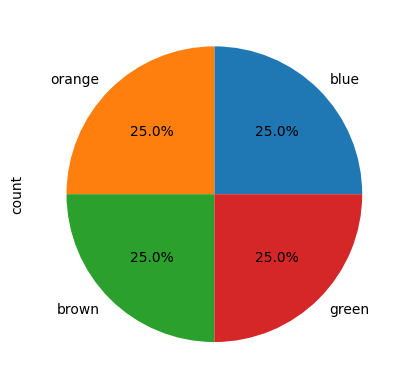

In [85]:
new_family_df['eye_color'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Density'>

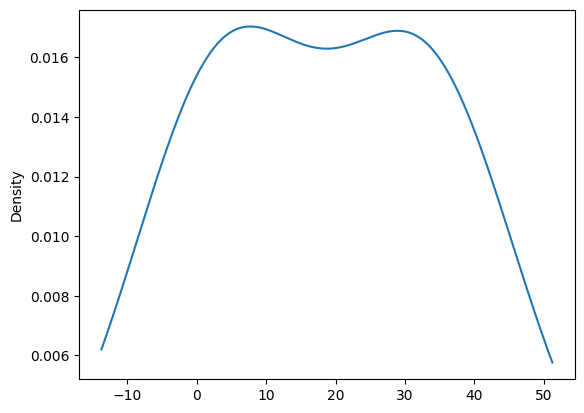

In [89]:
new_family_df['age'].plot.kde()

<Axes: >

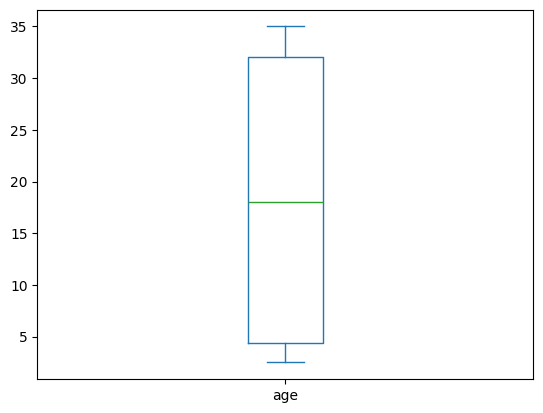

In [94]:
#new_family_df.plot.line()
new_family_df.plot.box()
#new_family_df.plot.area(alpha=0.4)

In [113]:
a = (population_df['In 2020'].head(6)/10379295)*100
#a.round(2)
a.to_frame('Share').style.format('{:.2f}%')

AttributeError: The '.style' accessor requires jinja2

In [118]:
# Alternative: show with % sign without using .style (avoids jinja2 dependency)
a_df = ((population_df['In 2020'].head(6) / 10379295) * 100).to_frame('Share')

population_df['Share'] = a_df['Share'].map(lambda v: f'{v:.2f}%')
population_df

,2020,2019,City,In 2020,In 2019,Difference,Share
0,1,1,Stockholm,975551,974073,1478,9.40%
1,2,2,Göteborg,583056,579281,3775,5.62%
2,3,3,Malmö,347949,344166,3783,3.35%
3,4,4,Uppsala,233839,230767,3072,2.25%
4,5,5,Linköping,164616,163051,1565,1.59%
5,6,6,Örebro,156381,155696,685,1.51%
6,7,7,Västerås,155551,154049,1502,NaN
7,8,8,Helsingborg,149280,147734,1546,NaN
8,9,9,Norrköping,143478,143171,307,NaN
9,10,10,Jönköping,142427,141081,1346,NaN
